## Crop and Fertilizer Recommendation System using ML

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
crop = pd.read_csv("dataset/Crop_recommendation.csv")

In [101]:
print("First 5 rows of the dataset:")
print(crop.head())

First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [102]:
print("\nLast 5 rows of the dataset:")
print(crop.tail())


Last 5 rows of the dataset:
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [103]:
print("\nShape of the dataset (rows, columns):")
print(crop.shape)


Shape of the dataset (rows, columns):
(2200, 8)


In [104]:
print("\nDataset Information:")
crop.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [105]:
print("\nChecking for missing values:")
print(crop.isnull().sum())


Checking for missing values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [106]:
print("\nNumber of duplicate rows:")
print(crop.duplicated().sum())


Number of duplicate rows:
0


In [107]:
print("\nDescriptive statistics of the dataset:")
print(crop.describe())


Descriptive statistics of the dataset:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   

In [108]:
print("\nColumn names in the dataset:")
print(crop.columns)


Column names in the dataset:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [109]:
print("\nValue counts for each crop label:")
print(crop['label'].value_counts())


Value counts for each crop label:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [110]:
features = crop.columns.to_list()
features.remove('label')
print("Features (excluding 'label'):", features)

Features (excluding 'label'): ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


Visualizing feature distributions:


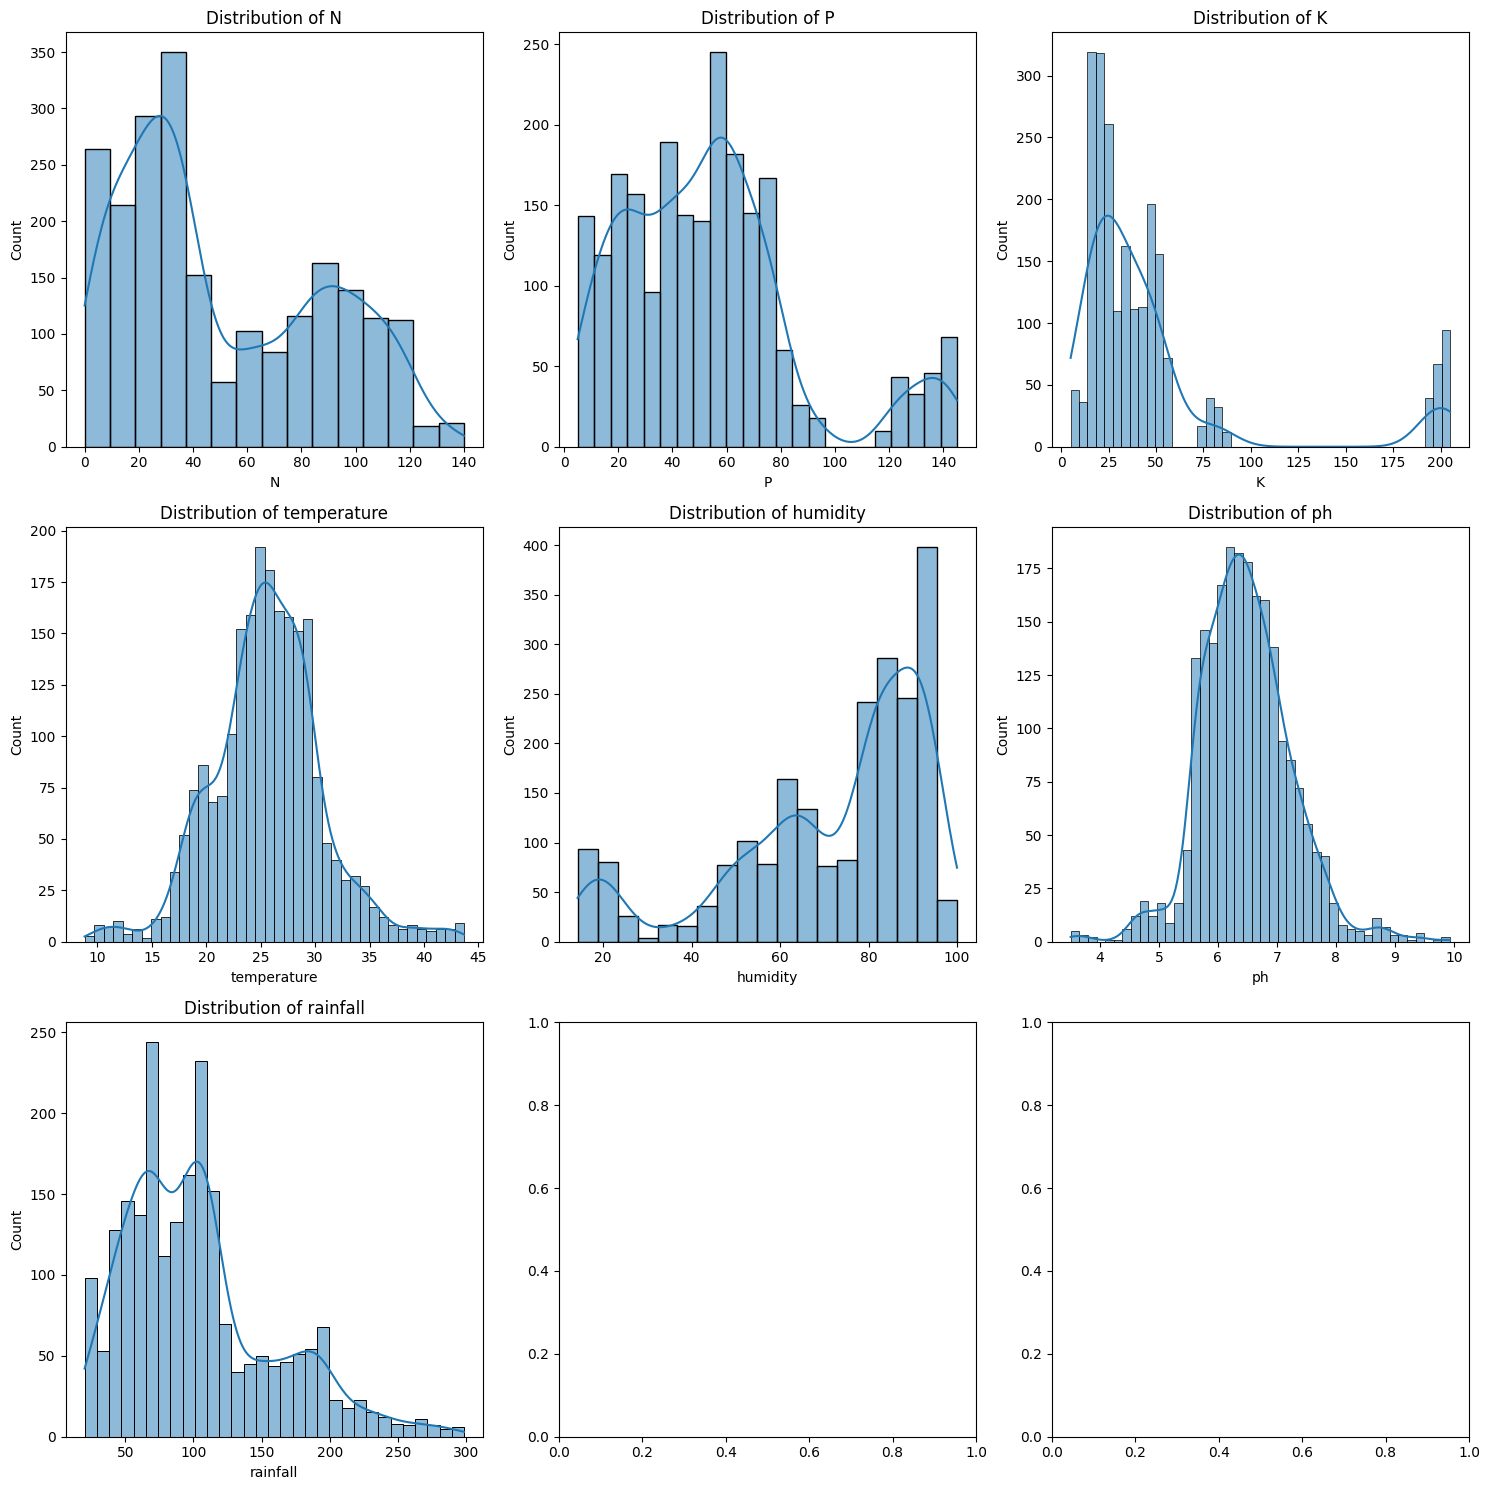

In [111]:
print("Visualizing feature distributions:")
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(f"Distribution of {i}")

plt.tight_layout()
plt.show()

Visualizing feature vs label relationships:


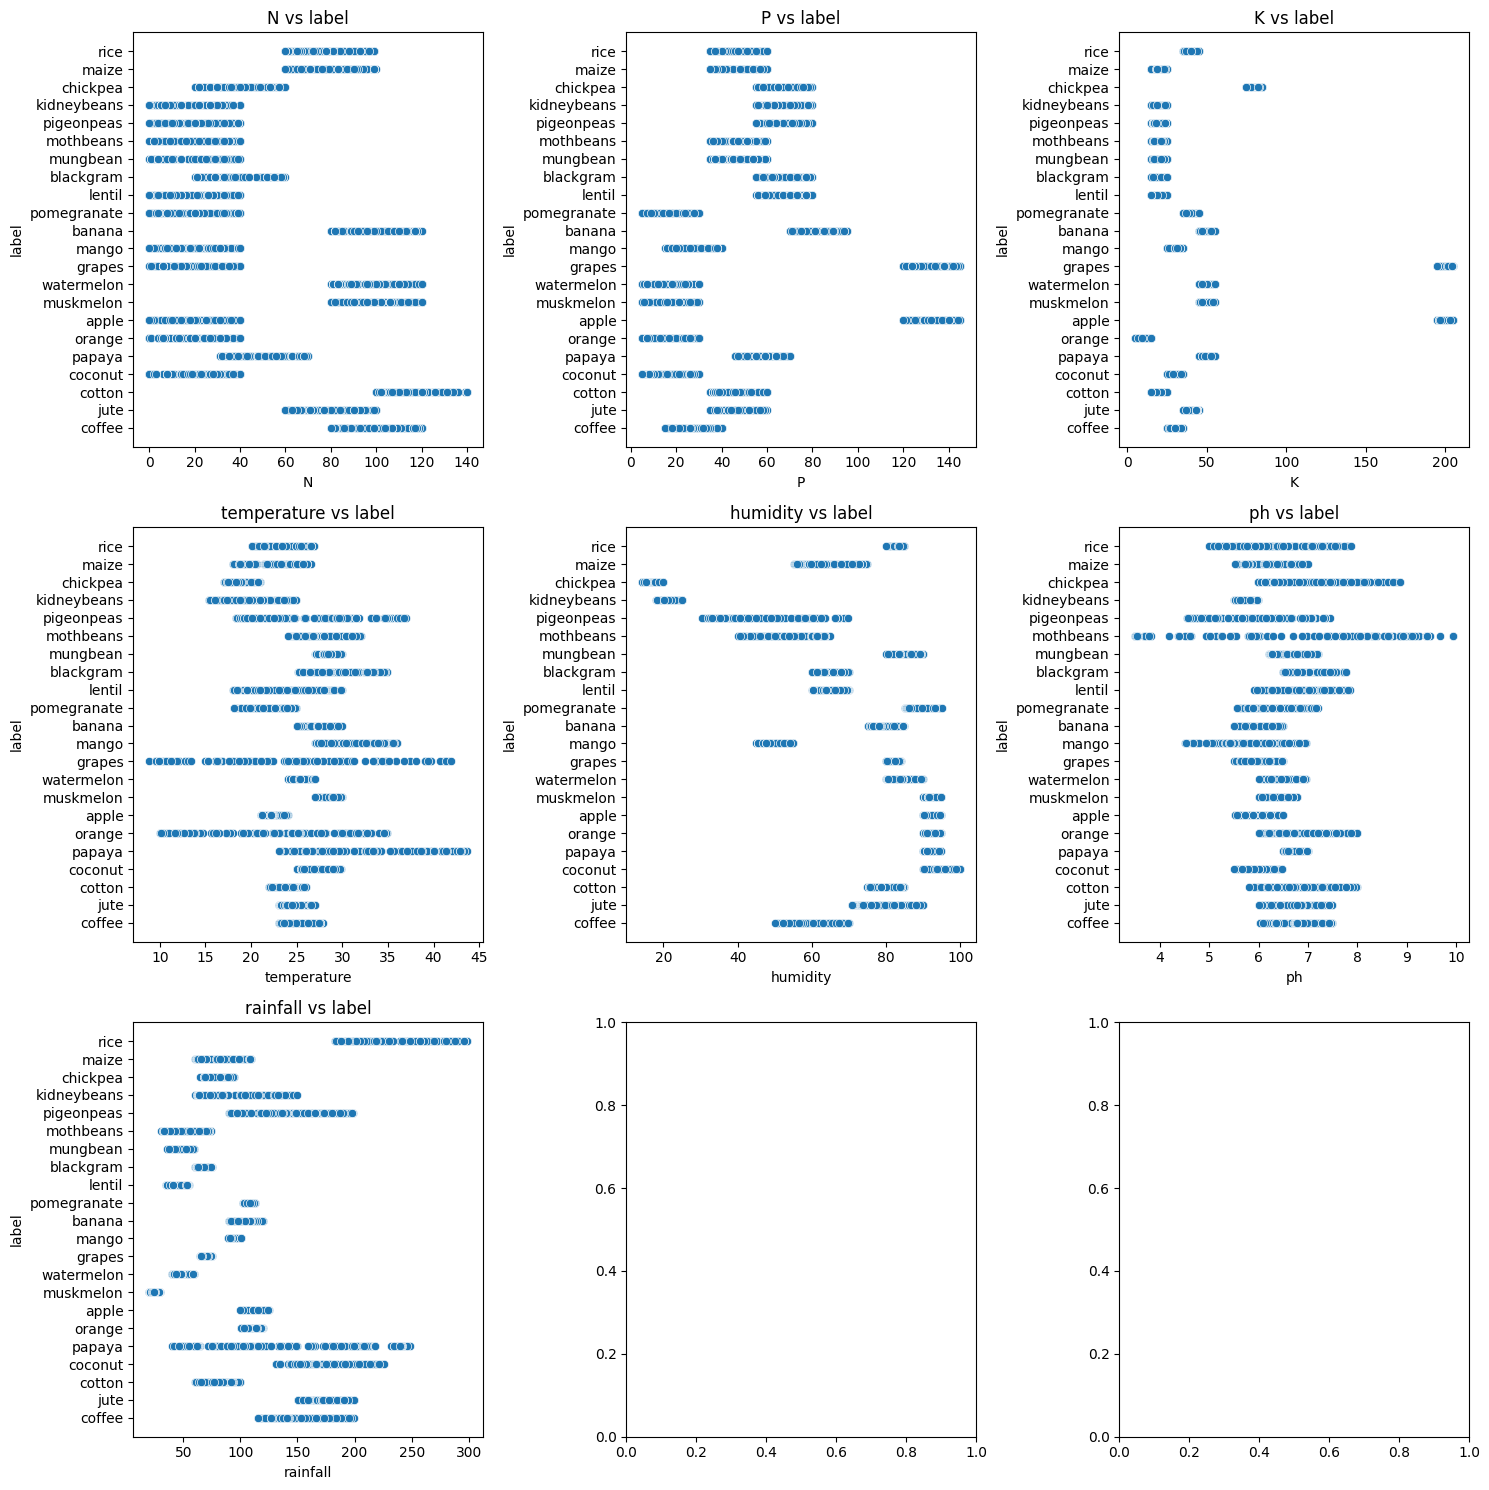

In [112]:
print("Visualizing feature vs label relationships:")
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
    subplot.set_title(f"{i} vs label")

plt.tight_layout()
plt.show()

Visualizing feature distributions with Box Plots:


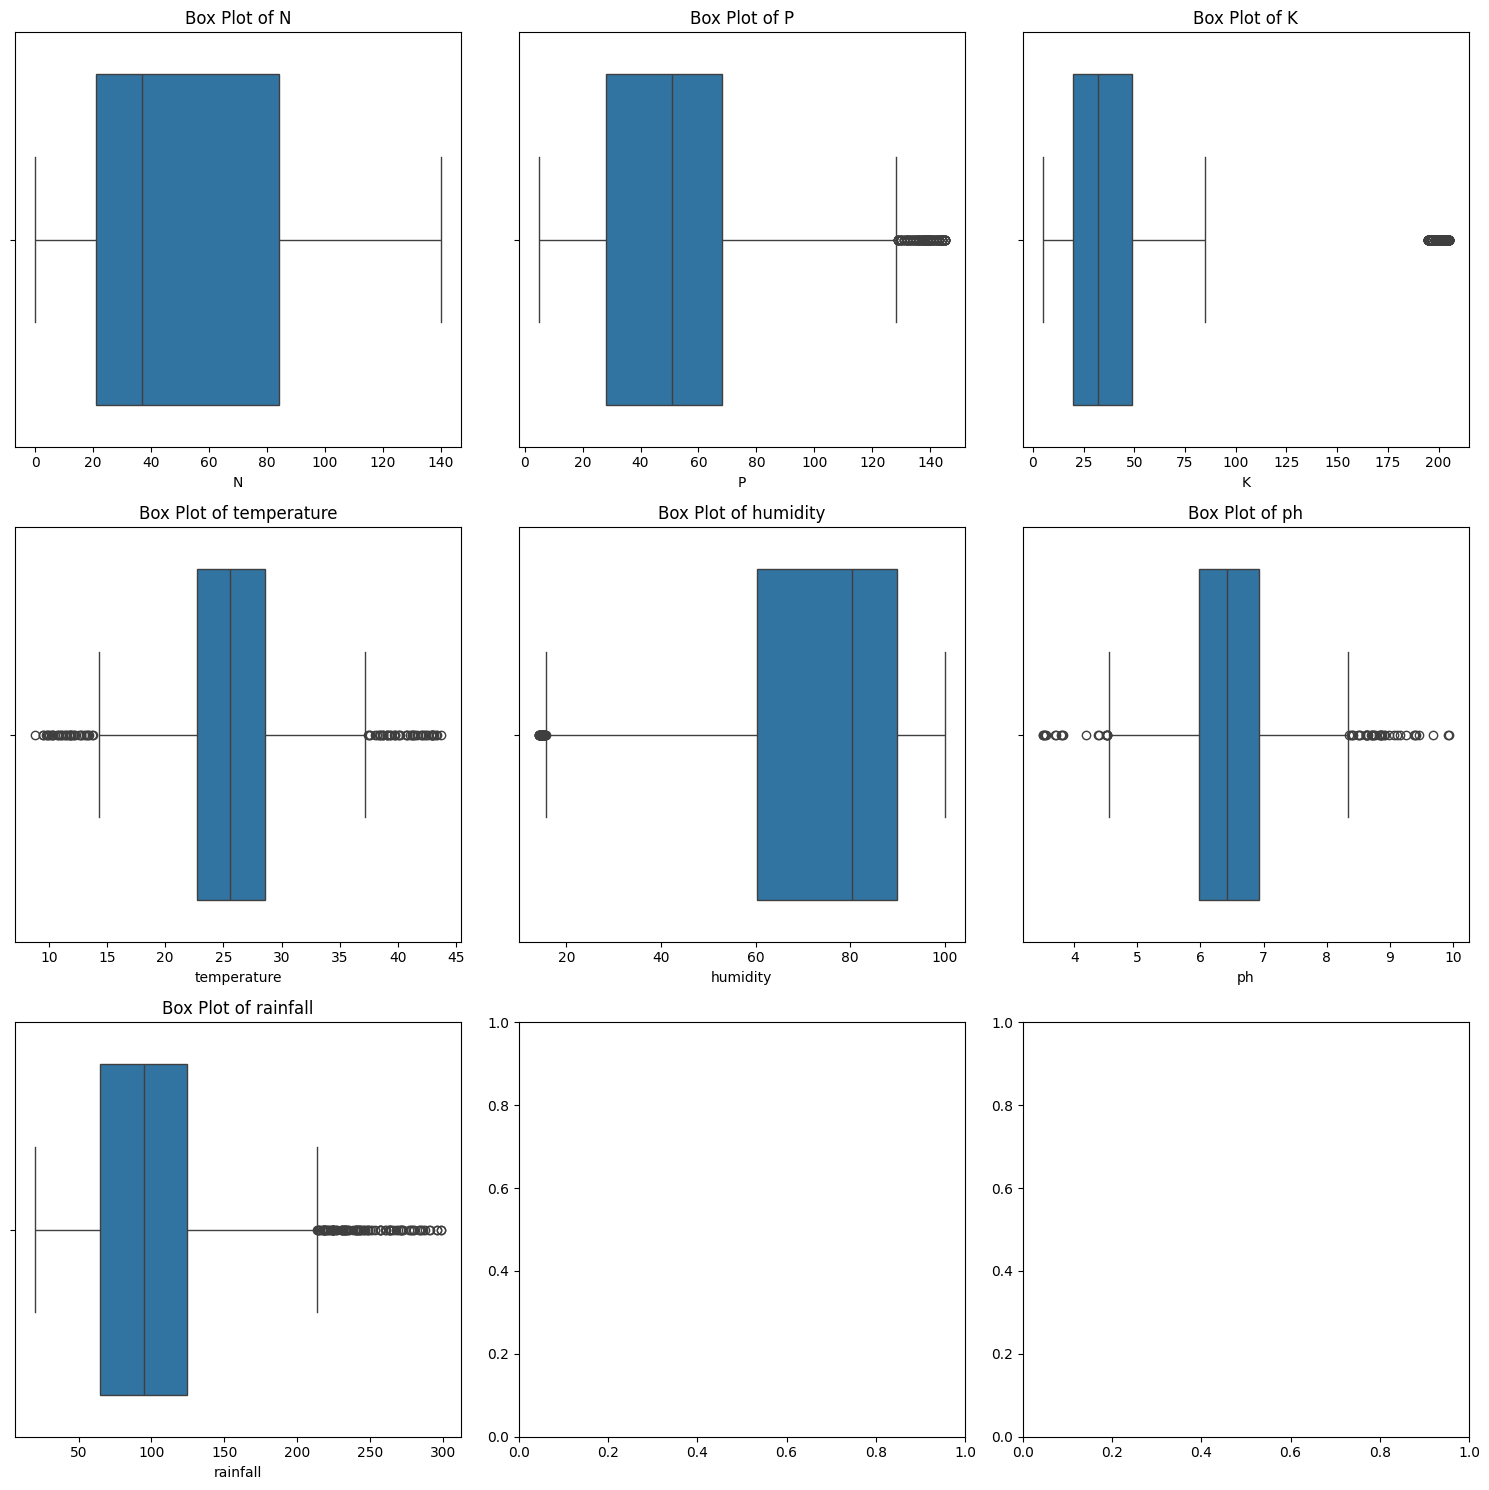

In [113]:
print("Visualizing feature distributions with Box Plots:")
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=crop[i], ax=subplot)
    subplot.set_title(f"Box Plot of {i}")

plt.tight_layout()
plt.show()

In [114]:
print("Selecting numerical columns:")
num_cols = crop.select_dtypes(include=[np.number])
num_cols

Selecting numerical columns:


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [115]:
print("Calculating correlation matrix:")
corr = num_cols.corr()
corr

Calculating correlation matrix:


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Visualizing Correlation Heatmap:


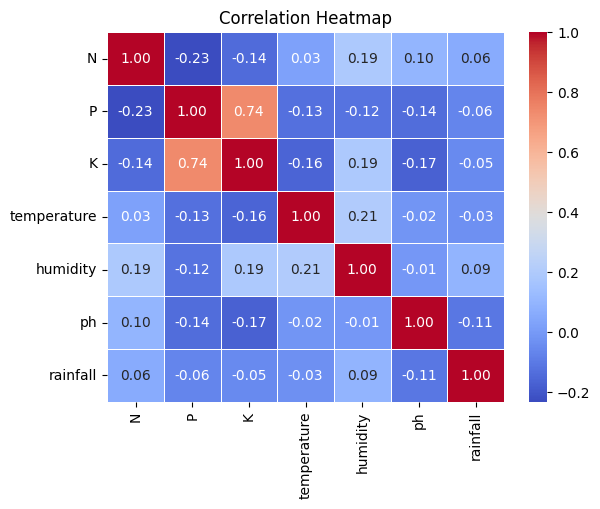

In [116]:
print("Visualizing Correlation Heatmap:")
num_cols = crop.select_dtypes(include=[np.number])
corr = num_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [117]:
print("Unique values in 'label' column:", crop['label'].unique())

Unique values in 'label' column: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [118]:
print("Mapping crop names to numeric values:")
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

Mapping crop names to numeric values:


In [119]:
crop['crop_no'] = crop['label'].map(crop_dict)
print("Updated 'label' column with numeric values:")
print(crop.head())

Updated 'label' column with numeric values:
    N   P   K  temperature   humidity        ph    rainfall label  crop_no
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        1


In [120]:
crop.drop('label', axis=1, inplace=True)
print("Dataset after dropping 'label' column:")
print(crop.tail())

Dataset after dropping 'label' column:
        N   P   K  temperature   humidity        ph    rainfall  crop_no
2195  107  34  32    26.774637  66.413269  6.780064  177.774507       22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610       22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839       22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293       22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041       22


## Train Test Split

In [121]:
x = crop.drop('crop_no',axis=1)
y = crop['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

The shape of x is : (2200, 7)
The shape of y is : (2200,)


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [123]:
for name, data in zip(["x_train", "y_train", "x_test", "y_test"], [x_train, y_train, x_test, y_test]):
    print(f"Shape of {name}: {data.shape}")

Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


### Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [125]:
crop = crop.dropna(subset=['crop_no'])

### Training the Model

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [129]:
y_pred = DT.predict(x_test)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred)}")

Accuracy score of Decision Tree Classifier is: 0.9840909090909091


In [130]:
y_pred_train = DT.predict(x_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 1.0


### Predictive System

In [131]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]

    
    return f"{crop} is a best crop to be cultivated."

In [133]:
inputs = {
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 20,
    "humidity": 82,
    "ph": 6.1,
    "rainfall": 202
}

crop_recommend(**inputs)


C:\Users\dhars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['Rice'] is a best crop to be cultivated."